In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import wrangle as w

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [5]:
zillow = w.wrangle_zillow()

In [6]:
zillow.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [7]:
zillow.shape

(1854411, 7)

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [8]:
train, validate, test = w.train_validate_test_split(zillow)

In [9]:
train.shape, validate.shape, test.shape

((1205830, 7), (370419, 7), (278162, 7))

In [10]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205830 entries, 1569291 to 789207
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedrooms     1205830 non-null  float64
 1   bathrooms    1205830 non-null  float64
 2   square_feet  1205830 non-null  float64
 3   tax_value    1205830 non-null  float64
 4   year_built   1205830 non-null  float64
 5   taxamount    1205830 non-null  float64
 6   fips         1205830 non-null  float64
dtypes: float64(7)
memory usage: 73.6 MB


In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,1205830.0,3.214239,0.781804,2.00,3.00,3.00,4.0000,5.00
bathrooms,1205830.0,2.053627,0.707881,1.00,2.00,2.00,2.5000,4.00
square_feet,1205830.0,1653.611200,564.451251,1.00,1231.00,1548.00,1988.0000,3410.00
tax_value,1205830.0,327920.735279,199013.312250,22.00,173755.00,296502.50,452483.5000,950940.00
year_built,1205830.0,1959.442647,20.562522,1807.00,1949.00,1957.00,1972.0000,2016.00
taxamount,1205830.0,4068.852788,2242.823679,16.48,2364.86,3746.22,5486.6275,10377.84
fips,1205830.0,6048.343767,20.554449,6037.00,6037.00,6037.00,6059.0000,6111.00


In [12]:
train_sample = train.sample(frac=.25)

In [13]:
train_sample.shape

(301458, 7)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [14]:
cols = train.columns.to_list()

cols.remove('tax_value')
cols.remove('fips')

In [15]:
cols

['bedrooms', 'bathrooms', 'square_feet', 'year_built', 'taxamount']

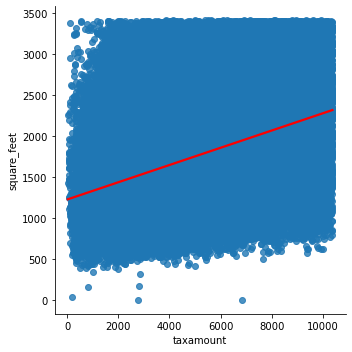

In [17]:
sns.lmplot(x="taxamount", y="square_feet", data=train_sample, line_kws={'color': 'red'})
plt.show()

In [30]:
def plot_variable_pairs(df):
    cols = df.columns.to_list()
    for col in cols:
        for col2 in cols:
            sns.lmplot(x=col, y=col2, data=train_sample, line_kws={'color': 'red'})
            plt.show()
            
            

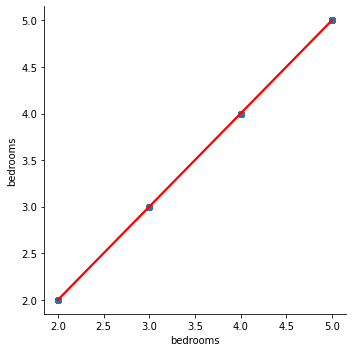

In [ ]:
plot_variable_pairs(train_sample)

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
sns.boxplot(x='bathrooms', y='square_feet', data=train)
plt.show()

In [ ]:
sns.violinplot(x='bathrooms', y='square_feet', data=train)
plt.show()

In [ ]:
sns.barplot(x='bathrooms', y='square_feet', data=train)
plt.show()

In [28]:
cat_vars = ['bathrooms', 'bedrooms', 'fips']
cont_vars = ['taxamount', 'tax_value', 'year_built']

In [29]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

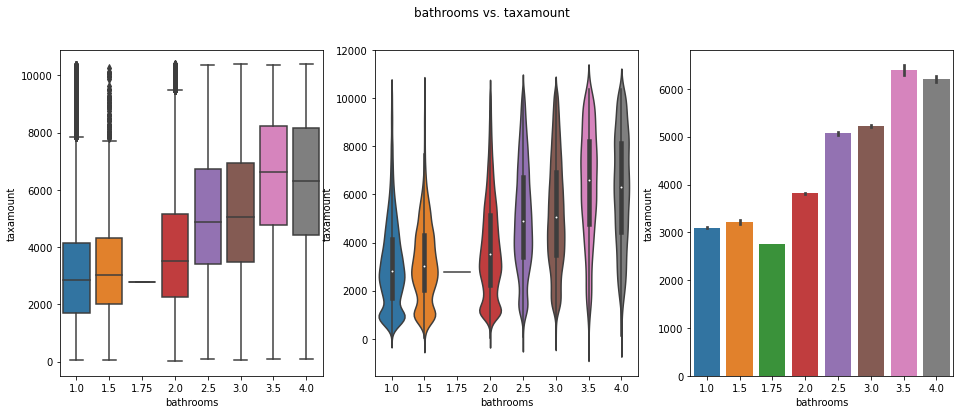

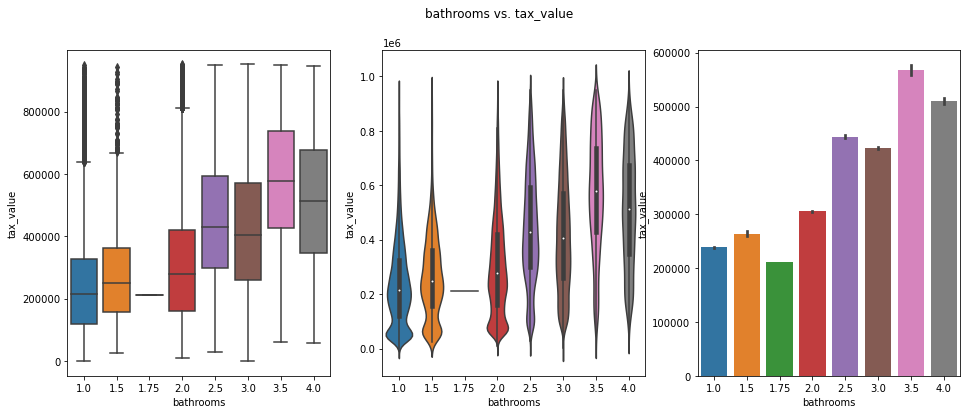

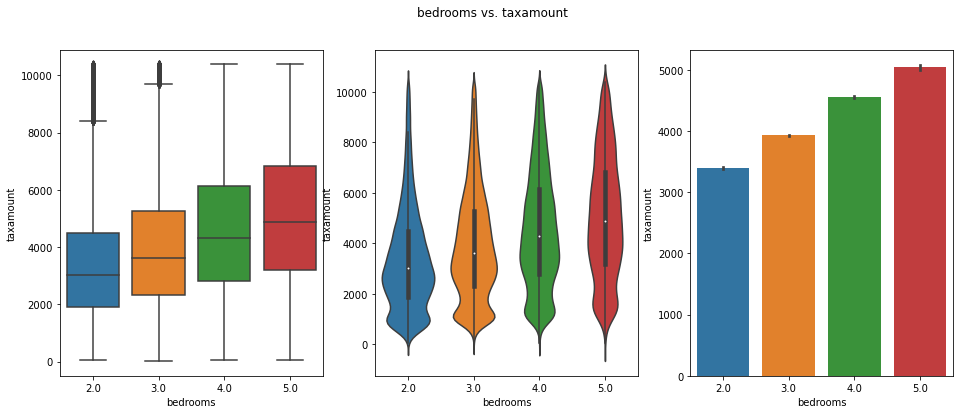

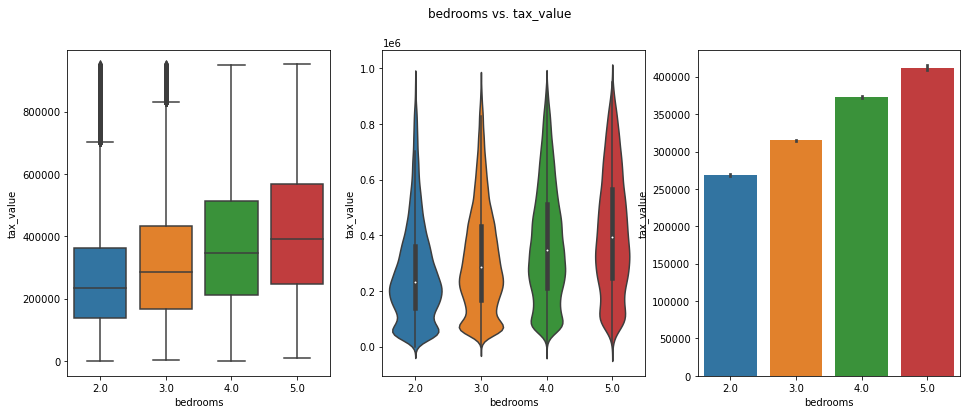

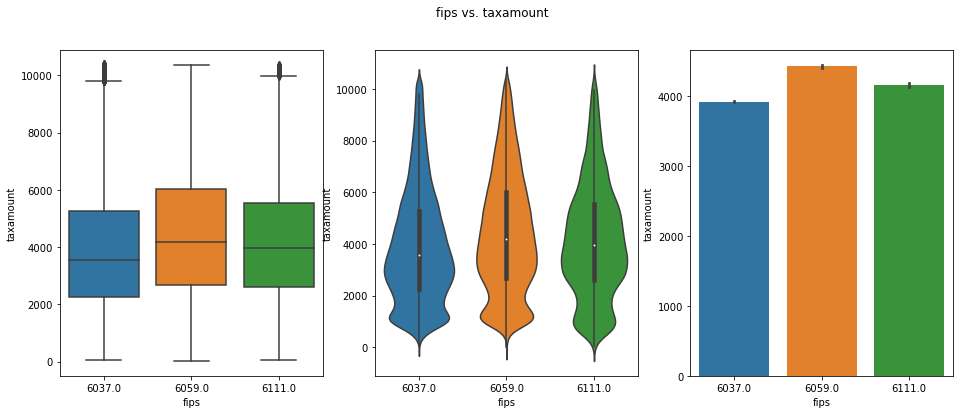

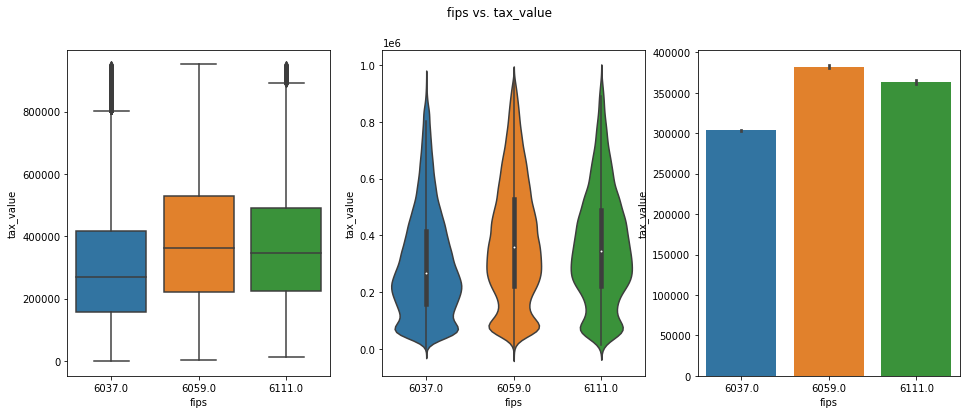

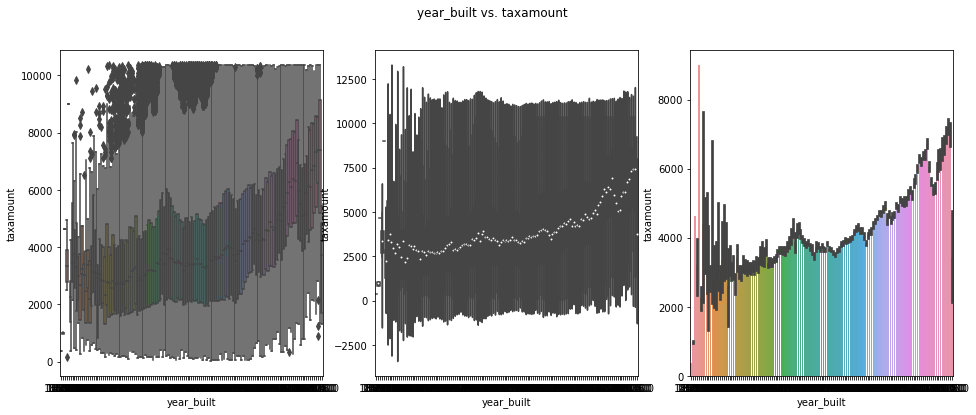

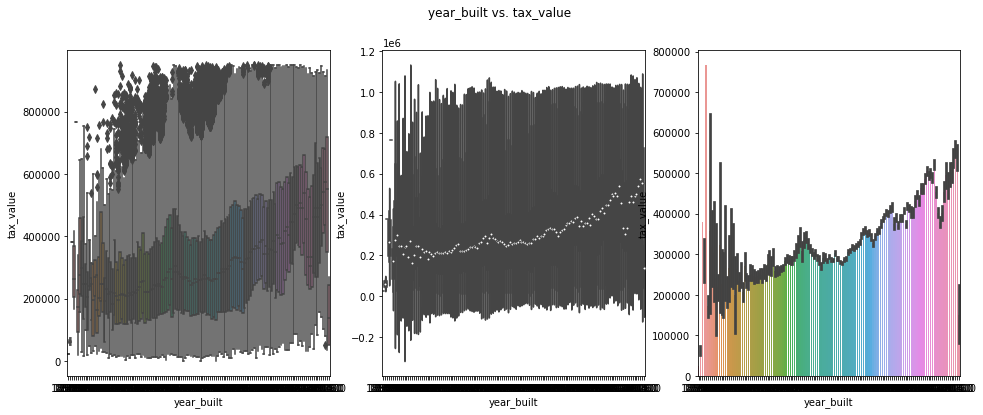

In [27]:
plot_categorical_and_continuous_vars(train_sample, cat_vars, cont_vars)

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

## 8. Visualize all combinations of variables in some way.

## 9. Run the appropriate statistical tests where needed.

## 10. What independent variables are correlated with the dependent variable, home value?

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 13. Explore your dataset with any other visualizations you think will be helpful.